In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
tabulador = pd.read_excel('tabulador_pe2019.xls', header = 9)

In [2]:
tabulador

,NIVEL,TIPO,PUESTO,SUELDO BASE,CUOTAS SEGURIDAD SOCIAL,PREVISIÓN SOCIAL,AYUDA X SERVICIOS,APOYO FAMILIAR,GRATIFICACIÓN QUINCENAL,SUELDO MENSUAL BRUTO,IMPTO MENSUAL,ISSEG,ISSSTE,SUELDO MENSUAL NETO,PRIMA VACACIONAL,AGUINALDO
0,22,NaN,GOBERNADOR/A DEL ESTADO,59804.327930,5843.070000,1913.1,25897,64294.837780,75373.99,233126.325711,69584.321342,5082.660000,760.410000,157698.934369,10 Días por Año,45 Días por Año
1,20,NaN,SECRETARIO/A DE ESTADO A,49025.945517,5843.070000,1913.1,22783,48858.839699,67187.62,195611.575216,56829.306173,5082.660000,760.410000,132939.199042,10 Días por Año,45 Días por Año
2,19,NaN,DIRECTOR/A GENERAL PARAESTATAL A,40685.951590,5843.070000,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.660000,760.410000,108033.486450,10 Días por Año,45 Días por Año
3,19,NaN,SECRETARIO/A DE ESTADO B,40685.951590,5843.070000,1913.1,18805,41397.705456,49230.82,157875.647046,43999.090596,5082.660000,760.410000,108033.486450,10 Días por Año,45 Días por Año
4,18,NaN,SECRETARIO/A DE ESTADO C,37083.708634,5843.070000,1913.1,16756,35924.238404,42651.90,140172.017038,37979.856393,5082.660000,760.410000,96349.090645,10 Días por Año,45 Días por Año
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1,NaN,OPERADOR/A ADMINISTRATIVO/A C,3374.277535,657.984119,1913.1,450,2364.753825,34.39,8794.505479,639.354852,556.755793,101.228326,7497.166508,10 Días por Año,45 Días por Año
75,1,A,OPERADOR/A ADMINISTRATIVO/A D,3080.400000,600.678000,1913.1,450,1572.330000,0.00,7616.508000,263.883632,508.266000,92.412000,6751.946368,10 Días por Año,45 Días por Año
76,1,A,OPERADOR/A DE SERVICIOS D,3080.400000,600.678000,1913.1,450,1572.330000,0.00,7616.508000,263.883632,508.266000,92.412000,6751.946368,10 Días por Año,45 Días por Año
77,1,A,OPERADOR/A COMERCIAL D,3080.400000,600.678000,1913.1,450,1572.330000,0.00,7616.508000,263.883632,508.266000,92.412000,6751.946368,10 Días por Año,45 Días por Año


In [65]:
sueldoBase = tabulador['SUELDO BASE']
cuotas = tabulador['CUOTAS SEGURIDAD SOCIAL']
ayuda = tabulador['AYUDA X SERVICIOS']
apoyoFam = tabulador['APOYO FAMILIAR']
gratificacion = tabulador['GRATIFICACIÓN QUINCENAL']
sueldoMensual = tabulador['SUELDO MENSUAL BRUTO']
impuesto = tabulador['IMPTO MENSUAL']
puestos = tabulador['PUESTO']
isseg = tabulador['ISSEG']
issste = tabulador['ISSSTE']
sueldoNeto = tabulador['SUELDO MENSUAL NETO']

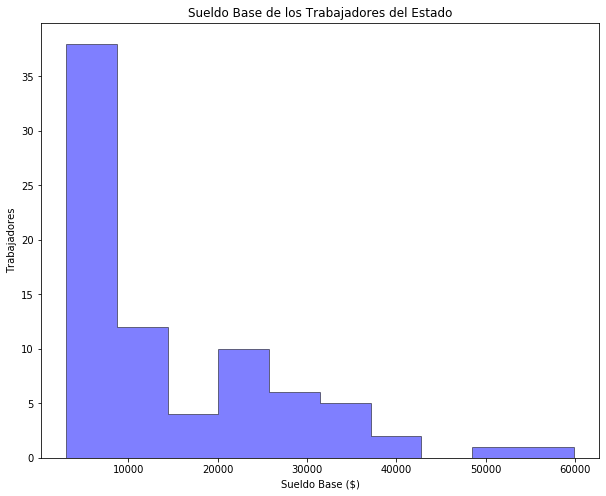

In [29]:
plt.figure(figsize=[10,8])
plt.hist(sueldoBase, bins=10, alpha=0.5, histtype='stepfilled', color='blue', edgecolor='black')
plt.title('Sueldo Base de los Trabajadores del Estado')
plt.xlabel('Sueldo Base ($)')
plt.ylabel('Trabajadores')
plt.show()

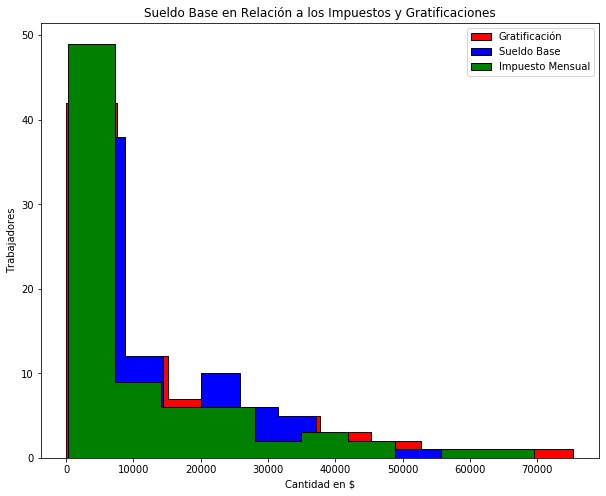

In [31]:
plt.figure(figsize=[10,8])
plt.hist(gratificacion, bins=10, alpha=1, histtype='stepfilled', color='red', edgecolor='black', label = 'Gratificación')
plt.hist(sueldoBase, bins=10, alpha=1, histtype='stepfilled', color='blue', edgecolor='black', label = 'Sueldo Base')
plt.hist(impuesto, bins=10, alpha=1, histtype='stepfilled', color='green', edgecolor='black', label = 'Impuesto Mensual')
plt.title('Sueldo Base en Relación a los Impuestos y Gratificaciones')
plt.xlabel('Cantidad en $')
plt.ylabel('Trabajadores')
plt.legend()
plt.show()

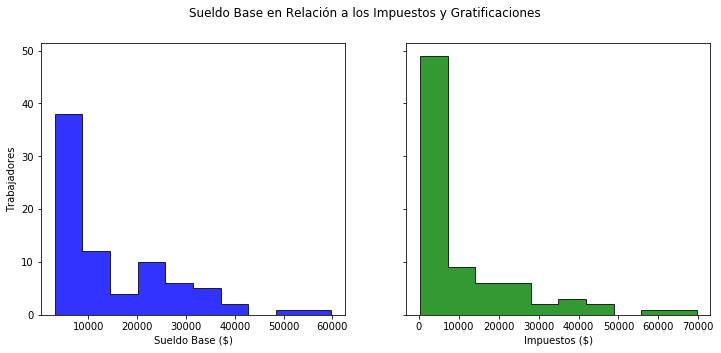

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey = True)

axs[0].hist(sueldoBase, bins=10, alpha=0.8, histtype='stepfilled', color='blue', edgecolor='black')
axs[1].hist(impuesto, bins=10, alpha=0.8, histtype='stepfilled', color='green', edgecolor='black')

fig.suptitle('Sueldo Base en Relación a los Impuestos y Gratificaciones')

axs[0].set_xlabel('Sueldo Base ($)')
axs[0].set_ylabel('Trabajadores')
axs[1].set_xlabel('Impuestos ($)')
plt.show()

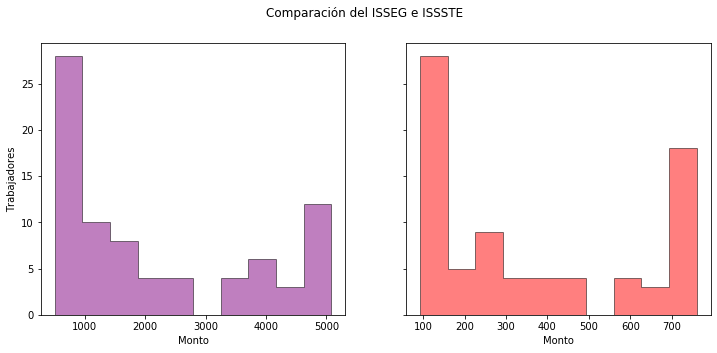

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey = True)

axs[0].hist(isseg, bins=10, alpha=0.5, histtype='stepfilled', color='purple', edgecolor='black')
axs[1].hist(issste, bins=10, alpha=0.5, histtype='stepfilled', color='red', edgecolor='black')

fig.suptitle('Comparación del ISSEG e ISSSTE')

axs[0].set_xlabel('Monto')
axs[0].set_ylabel('Trabajadores')
axs[1].set_xlabel('Monto')
plt.show()

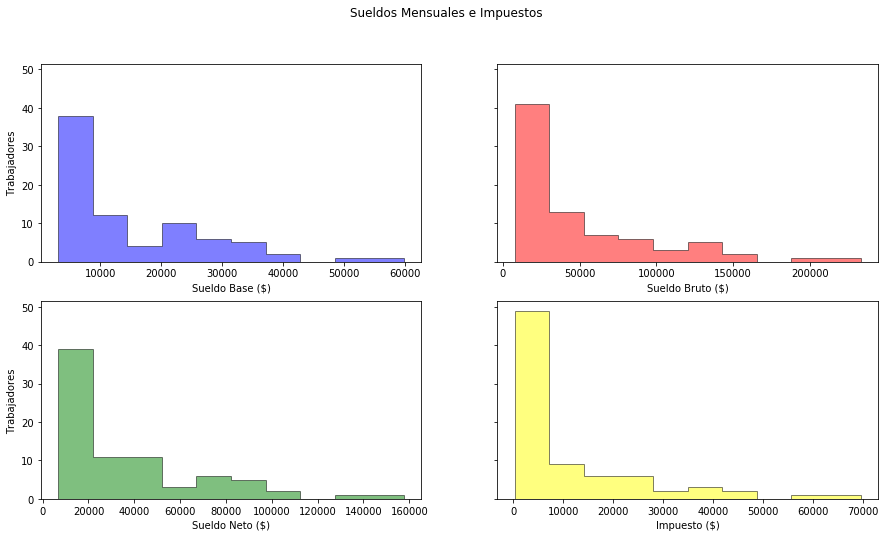

In [77]:
fig, axs = plt.subplots(2, 2, figsize=(15, 8), sharey = True)

axs[0, 0].hist(sueldoBase, bins=10, alpha=0.5, histtype='stepfilled', color='blue', edgecolor='black')
axs[0, 1].hist(sueldoMensual, bins=10, alpha=0.5, histtype='stepfilled', color='red', edgecolor='black')
axs[1, 0].hist(sueldoNeto, bins=10, alpha=0.5, histtype='stepfilled', color='green', edgecolor='black')
axs[1, 1].hist(impuesto, bins=10, alpha=0.5, histtype='stepfilled', color='yellow', edgecolor='black')

fig.suptitle('Sueldos Mensuales e Impuestos')

axs[0, 0].set_xlabel('Sueldo Base ($)')
axs[0, 0].set_ylabel('Trabajadores')

axs[0, 1].set_xlabel('Sueldo Bruto ($)')

axs[1, 0].set_ylabel('Trabajadores')
axs[1, 0].set_xlabel('Sueldo Neto ($)')

axs[1, 1].set_xlabel('Impuesto ($)')
plt.show()

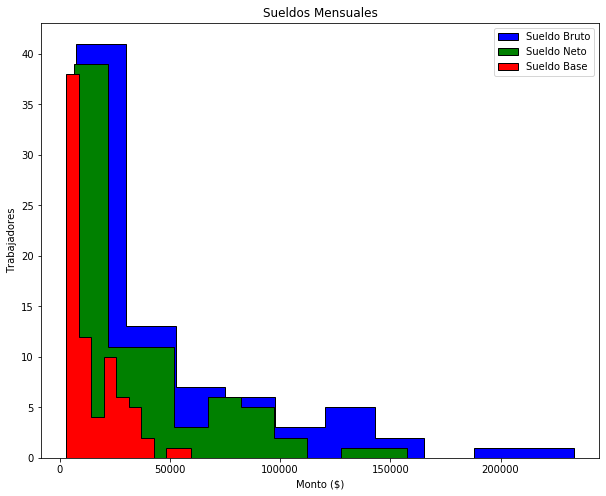

In [81]:
plt.figure(figsize=[10,8])
plt.hist(sueldoMensual, alpha=1, histtype='stepfilled', color='blue', edgecolor='black', label = 'Sueldo Bruto')
plt.hist(sueldoNeto, alpha=1, histtype='stepfilled', color='green', edgecolor='black', label = 'Sueldo Neto')
plt.hist(sueldoBase, alpha=1, histtype='stepfilled', color='red', edgecolor='black', label = 'Sueldo Base')
plt.title('Sueldos Mensuales')
plt.xlabel('Monto ($)')
plt.ylabel('Trabajadores')
plt.legend()
plt.show()

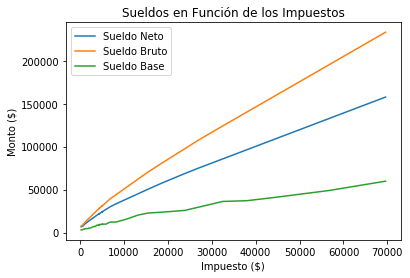

In [90]:
plt.title("Sueldos en Función de los Impuestos")
plt.xlabel('Impuesto ($)')
plt.ylabel('Monto ($)')

plt.plot(impuesto, sueldoNeto, label = 'Sueldo Neto')
plt.plot(impuesto, sueldoMensual, label = 'Sueldo Bruto')
plt.plot(impuesto, sueldoBase, label = 'Sueldo Base')
plt.legend()
plt.show()

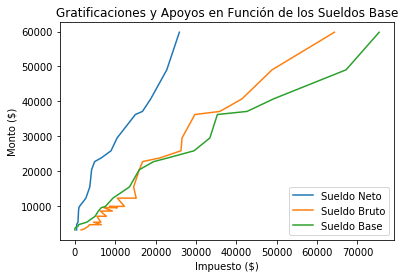

In [94]:
plt.title("Gratificaciones y Apoyos en Función de los Sueldos Base")
plt.xlabel('Impuesto ($)')
plt.ylabel('Monto ($)')

plt.plot(ayuda, sueldoBase, label = 'Sueldo Neto')
plt.plot(apoyoFam, sueldoBase, label = 'Sueldo Bruto')
plt.plot(gratificacion, sueldoBase, label = 'Sueldo Base')
plt.legend()
plt.show()

# Lluvias

In [102]:
rainEne2018 = pd.read_csv('201801010000Lluv.csv', encoding='latin-1')
rainFeb2018 = pd.read_csv('201802010000Lluv.csv', encoding='latin-1')
rainMar2018 = pd.read_csv('201803010000Lluv.csv', encoding='latin-1')
rainAbr2018 = pd.read_csv('201804010000Lluv.csv', encoding='latin-1')
rainMay2018 = pd.read_csv('201805010000Lluv.csv', encoding='latin-1')
rainJun2018 = pd.read_csv('201806010000Lluv.csv', encoding='latin-1')
rainJul2018 = pd.read_csv('201807010000Lluv.csv', encoding='latin-1')
rainAgo2018 = pd.read_csv('201808010000Lluv.csv', encoding='latin-1')
rainOct2018 = pd.read_csv('201810010000Lluv.csv', encoding='latin-1')
rainNov2018 = pd.read_csv('201811010000Lluv.csv', encoding='latin-1')

In [103]:
rainData2018 = pd.merge(rainEne2018, rainFeb2018)
rainData2018 = pd.merge(rainData2018, rainMar2018)
rainData2018 = pd.merge(rainData2018, rainAbr2018)
rainData2018 = pd.merge(rainData2018, rainMay2018)
rainData2018 = pd.merge(rainData2018, rainJun2018)
rainData2018 = pd.merge(rainData2018, rainJul2018)
rainData2018 = pd.merge(rainData2018, rainAgo2018)
rainData2018 = pd.merge(rainData2018, rainOct2018)
rainData2018 = pd.merge(rainData2018, rainNov2018)
rainData2018

,LON,LAT,ESTADO,CLAVE_SIH,NOMBRE,ENE,FEB,EDO,MAR,ABR,...,JUN,JUL,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,AGO,OCT,NOV
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",25.8,28.7,AGS,0.00,0.0,...,112.50,34.5,NaN,NaN,NaN,NaN,NaN,128.2,119.54,47.14
1,-102.466944,22.188611,AGS,ANVAG,"Cincuenta Aniversario, Ags.",58.6,24.4,AGS,0.00,2.6,...,191.20,28.8,NaN,NaN,NaN,NaN,NaN,63.4,109.80,31.80
2,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",56.0,19.5,AGS,0.00,5.3,...,201.50,108.0,NaN,NaN,NaN,NaN,NaN,78.3,100.76,21.66
3,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",50.0,30.0,AGS,0.00,0.0,...,250.00,110.5,NaN,NaN,NaN,NaN,NaN,80.4,113.00,30.00
4,-102.000000,21.896389,AGS,CNSAG,"Los Conos, Ags.",51.5,33.0,AGS,0.01,106.3,...,289.11,64.4,NaN,NaN,NaN,NaN,NaN,129.8,65.33,54.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,-103.636667,23.638889,ZAC,SOMZC,"Sombrerete, Zac.",8.2,20.9,ZAC,0.30,3.5,...,77.90,64.4,NaN,NaN,NaN,NaN,NaN,105.0,91.50,16.20
661,-103.495833,22.326667,ZAC,STEZC,"Santa Teresa (Independencia Nacional), Zac.",27.9,17.1,ZAC,0.00,1.0,...,176.10,95.8,NaN,NaN,NaN,NaN,NaN,108.3,60.70,42.50
662,-103.108889,22.923611,ZAC,STRZC,"Santa Rosa, Zac.",25.5,53.0,ZAC,0.01,0.0,...,105.02,53.6,NaN,NaN,NaN,NaN,NaN,106.2,96.81,5.21
663,-103.879722,23.471944,ZAC,TCHZC,"Chalchihuites, Zac.",6.0,22.0,ZAC,0.00,1.0,...,112.70,143.5,NaN,NaN,NaN,NaN,NaN,118.5,65.40,23.00


In [200]:
rainEne2019 = pd.read_csv('201801010000Lluv.csv', encoding='latin-1')
rainFeb2019 = pd.read_csv('201802010000Lluv.csv', encoding='latin-1')
rainMar2019 = pd.read_csv('201903010000Lluv.csv', encoding='latin-1')
rainAbr2019 = pd.read_csv('201904010000Lluv.csv', encoding='latin-1')
rainMay2019 = pd.read_csv('201905010000Lluv.csv', encoding='latin-1')
rainJun2019 = pd.read_csv('201906010000Lluv.csv', encoding='latin-1')
rainJul2019 = pd.read_csv('201907010000Lluv.csv', encoding='latin-1')
rainAgo2019 = pd.read_csv('201908010000Lluv.csv', encoding='latin-1')
rainOct2019 = pd.read_csv('201910010000Lluv.csv', encoding='latin-1')
rainNov2019 = pd.read_csv('201911010000Lluv.csv', encoding='latin-1')

In [201]:
rainData2019 = pd.merge(rainEne2019, rainFeb2019)
rainData2019 = pd.merge(rainData2019, rainMar2019)
rainData2019 = pd.merge(rainData2019, rainAbr2019)
rainData2019 = pd.merge(rainData2019, rainMay2019)
rainData2019 = pd.merge(rainData2019, rainJun2019)

rainJul2019 = rainJul2019.rename(columns = {'ESTACION': 'NOMBRE'})
rainData2019 = pd.merge(rainData2019, rainJul2019)

rainAgo2019 = rainAgo2019.rename(columns = {'ESTACION': 'NOMBRE'})
rainData2019 = pd.merge(rainData2019, rainAgo2019)

rainOct2019 = rainOct2019.rename(columns = {'ESTACION': 'NOMBRE'})
rainOct2019 = rainOct2019.rename(columns = {'oct-19': 'OCT'})
rainData2019 = pd.merge(rainData2019, rainOct2019)

rainNov2019 = rainNov2019.rename(columns = {'ESTACION': 'NOMBRE'})
rainNov2019 = rainNov2019.rename(columns = {'nov-19': 'NOV'})
rainData2019 = pd.merge(rainData2019, rainNov2019)

rainData2019

,LON,LAT,ESTADO,CLAVE_SIH,NOMBRE,ENE,FEB,EDO,MAR,ABR,MAY,JUN,CLAVE,JUL,AGO,OCT,NOV
0,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",56.0,19.5,AGS,0.00,0.00,5.32,101.27,CALVILLO,18.3,105.47,22.23,29.8
1,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",50.0,30.0,AGS,0.00,0.00,0.00,35.00,CDRAG,139.0,156.30,64.00,35.8
2,-102.000000,21.896389,AGS,CNSAG,"Los Conos, Ags.",51.5,33.0,AGS,2.31,0.00,3.22,46.72,CNSAG,100.4,160.73,40.62,46.8
3,-102.788333,21.807500,AGS,MNLAG,"Media Luna, Ags.",48.9,32.7,AGS,0.00,0.00,6.00,96.42,MNLAG,131.4,226.03,27.22,34.4
4,-102.371667,21.780000,AGS,NGRAG,"El Niagara, Ags.",25.4,41.1,AGS,0.00,0.00,0.01,19.96,NGRAG,173.3,155.45,63.90,24.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,-102.884444,24.322222,ZAC,SFOZC,"San Francisco, Zac.",9.7,9.0,ZAC,2.01,0.01,2.32,51.13,SFOZC,20.4,9.64,1.52,40.6
604,-103.636667,23.638889,ZAC,SOMZC,"Sombrerete, Zac.",8.2,20.9,ZAC,0.50,0.00,2.80,25.20,SOMZC,73.2,132.60,11.80,66.3
605,-103.495833,22.326667,ZAC,STEZC,"Santa Teresa (Independencia Nacional), Zac.",27.9,17.1,ZAC,0.01,0.00,1.00,46.20,STEZC,162.1,112.10,71.80,54.2
606,-103.108889,22.923611,ZAC,STRZC,"Santa Rosa, Zac.",25.5,53.0,ZAC,0.01,0.00,4.21,49.60,STRZC,81.2,93.60,34.41,56.2


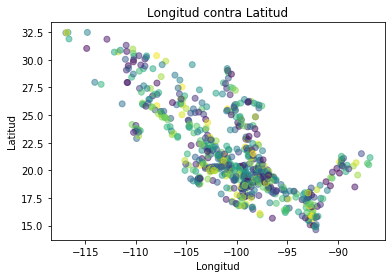

In [114]:
plt.title("Longitud contra Latitud")
plt.xlabel('Longitud')
plt.ylabel('Latitud')

colors = np.random.rand(665)

plt.scatter(rainData2018['LON'], rainData2018['LAT'], c = colors, alpha = 0.5)

plt.show()

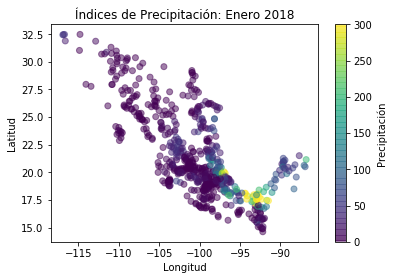

In [126]:
plt.title("Índices de Precipitación: Enero 2018")
plt.xlabel('Longitud')
plt.ylabel('Latitud')

colors = np.random.rand(665)

plt.scatter(rainData2018['LON'], rainData2018['LAT'], c = rainData2018['ENE'], alpha = 0.5)
plt.colorbar(label = 'Precipitación')
plt.clim(0, 300)

plt.show()

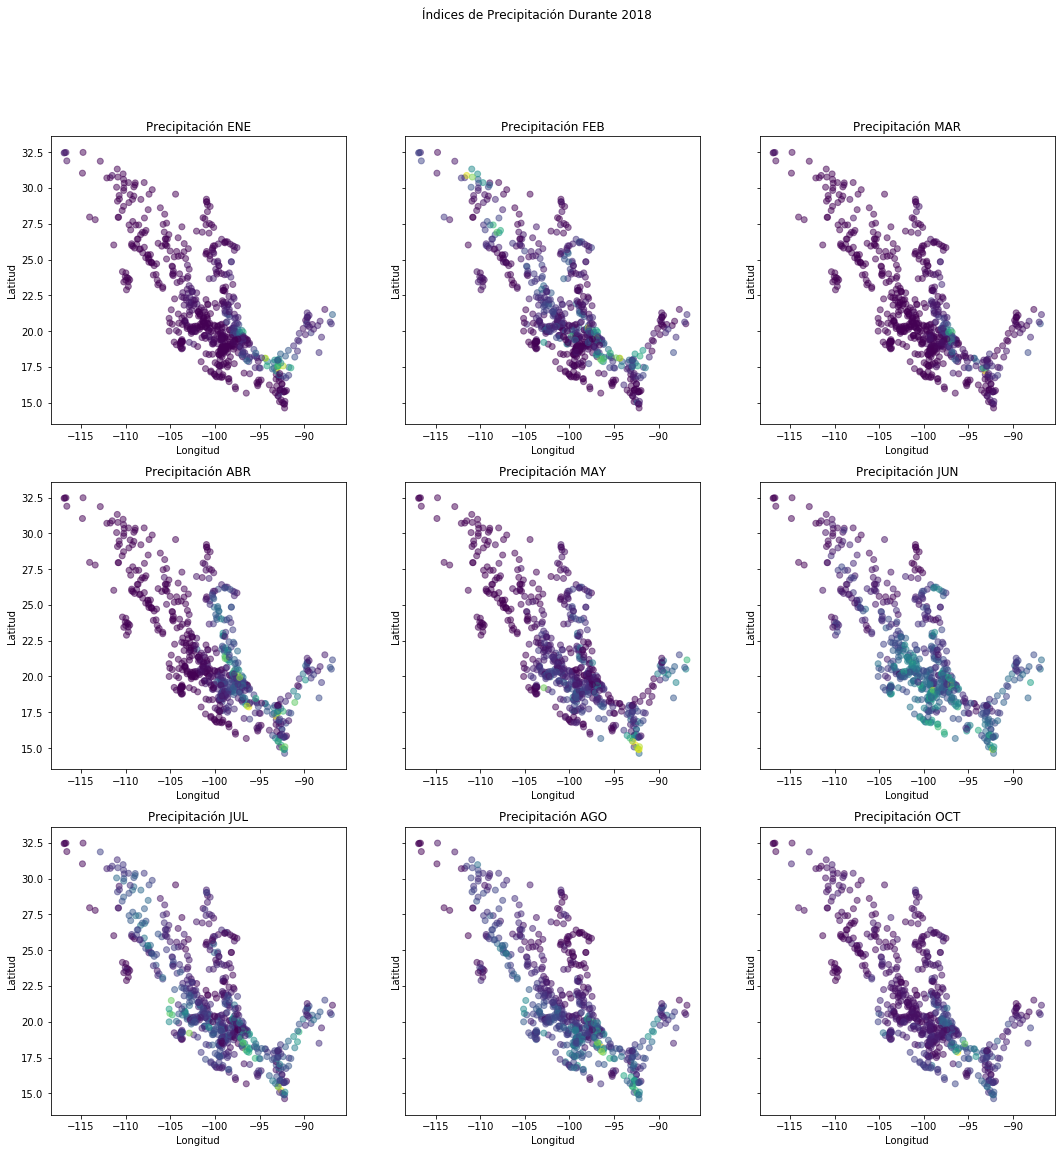

In [168]:
fig, axs = plt.subplots(3, 3, figsize=(18, 18), sharey = True)

months = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'OCT', 'NOV']

fig.suptitle('Índices de Precipitación Durante 2018')

k = 0
for i in range(0, 3):
    for j in range(0, 3):
        axs[i, j].scatter(rainData2018['LON'], rainData2018['LAT'], c = rainData2018[months[k]], alpha = 0.5)
        axs[i, j].set_xlabel('Longitud')
        axs[i, j].set_ylabel('Latitud')
        axs[i, j].title.set_text('Precipitación ' + months[k])
        k = k + 1

plt.show()

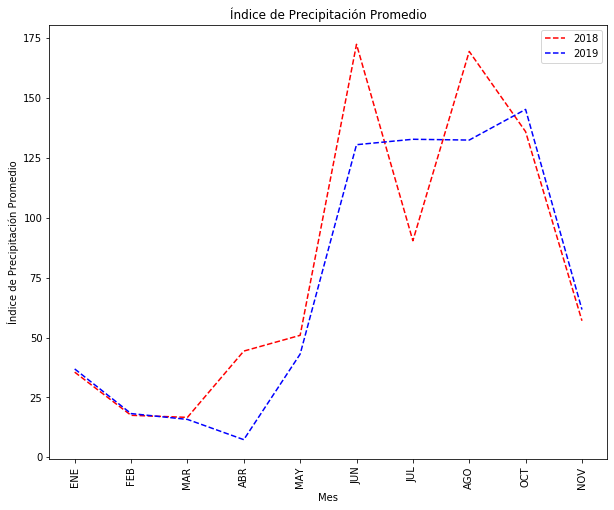

In [205]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.title("Índice de Precipitación Promedio")
plt.xlabel('Mes')
plt.ylabel('Índice de Precipitación Promedio')

x = np.linspace(0, 10, 10)

meanRain2018 = []
meanRain2018.append(np.mean(rainData2018['ENE']))
meanRain2018.append(np.mean(rainData2018['FEB']))
meanRain2018.append(np.mean(rainData2018['MAR']))
meanRain2018.append(np.mean(rainData2018['ABR']))
meanRain2018.append(np.mean(rainData2018['MAY']))
meanRain2018.append(np.mean(rainData2018['JUN']))
meanRain2018.append(np.mean(rainData2018['JUL']))
meanRain2018.append(np.mean(rainData2018['AGO']))
meanRain2018.append(np.mean(rainData2018['OCT']))
meanRain2018.append(np.mean(rainData2018['NOV']))

meanRain2019 = []
meanRain2019.append(np.mean(rainData2019['ENE']))
meanRain2019.append(np.mean(rainData2019['FEB']))
meanRain2019.append(np.mean(rainData2019['MAR']))
meanRain2019.append(np.mean(rainData2019['ABR']))
meanRain2019.append(np.mean(rainData2019['MAY']))
meanRain2019.append(np.mean(rainData2019['JUN']))
meanRain2019.append(np.mean(rainData2019['JUL']))
meanRain2019.append(np.mean(rainData2019['AGO']))
meanRain2019.append(np.mean(rainData2019['OCT']))
meanRain2019.append(np.mean(rainData2019['NOV']))

ax.set_xticks(x)
ax.set_xticklabels(months, rotation='vertical', fontsize=10)

plt.plot(x, meanRain2018, 'r--', label = '2018')
plt.plot(x, meanRain2019, 'b--', label = '2019')
plt.legend()
plt.show()

In [237]:
tminEne2018 = pd.read_csv('201801010000TMin.csv', encoding='latin-1')
tminEne2018 = tminEne2018.rename(columns = {'Tmin': 'ENE'})

tminFeb2018 = pd.read_csv('201802010000TMin.csv', encoding='latin-1')
tminFeb2018 = tminFeb2018.rename(columns = {'Tmin': 'FEB'})

tminMar2018 = pd.read_csv('201803010000TMin.csv', encoding='latin-1')
tminMar2018 = tminMar2018.rename(columns = {'Tmin': 'MAR'})

tminAbr2018 = pd.read_csv('201804010000TMin.csv', encoding='latin-1')
tminAbr2018 = tminAbr2018.rename(columns = {'Tmin': 'ABR'})

tminMay2018 = pd.read_csv('201805010000TMin.csv', encoding='latin-1')
tminMay2018 = tminMay2018.rename(columns = {'Tmin': 'MAY'})


tminJun2018 = pd.read_csv('201806010000TMin.csv', encoding='latin-1')
tminJun2018 = tminJun2018.rename(columns = {'Tmin': 'JUN'})


tminJul2018 = pd.read_csv('201807010000TMin.csv', encoding='latin-1')
tminJul2018 = tminJul2018.rename(columns = {'Tmin': 'JUL'})


tminAgo2018 = pd.read_csv('201808010000TMin.csv', encoding='latin-1')
tminAgo2018 = tminAgo2018.rename(columns = {'Tmin': 'AGO'})


tminOct2018 = pd.read_csv('201810010000TMin.csv', encoding='latin-1')
tminOct2018 = tminOct2018.rename(columns = {'Tmin': 'OCT'})


tminNov2018 = pd.read_csv('201811010000TMin.csv', encoding='latin-1')
tminNov2018 = tminNov2018.rename(columns = {'Tmin': 'NOV'})

minTempData2018 = pd.merge(tminEne2018, tminFeb2018)
minTempData2018 = pd.merge(minTempData2018, tminMar2018)
minTempData2018 = pd.merge(minTempData2018, tminAbr2018)
minTempData2018 = pd.merge(minTempData2018, tminMay2018)
minTempData2018 = pd.merge(minTempData2018, tminJun2018)
minTempData2018 = pd.merge(minTempData2018, tminJul2018)
minTempData2018 = pd.merge(minTempData2018, tminAgo2018)
minTempData2018 = pd.merge(minTempData2018, tminOct2018)
minTempData2018 = pd.merge(minTempData2018, tminNov2018)
minTempData2018

,Lon,Lat,Clave,Edo,Est,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,OCT,NOV
0,-99.75,16.76,76805,GRO,ACAPULCO,21.2,21.6,21.0,21.8,24.4,24.2,25.0,24.5,24.5,23.646429
1,-102.29,21.85,76571,AGS,AGUASCALIENTES,4.9,9.4,9.5,11.6,14.5,16.0,14.2,14.5,13.1,7.707143
2,-111.83,30.71,76113,SON,ALTAR,7.2,8.3,9.8,13.8,15.7,21.8,26.0,25.0,16.0,8.137931
3,-93.90,16.24,76840,CHIS,ARRIAGA,21.2,23.0,23.2,23.6,23.4,22.7,23.8,23.5,22.0,22.396667
4,-90.50,19.83,76695,CAMP,CAMPECHE,17.4,20.1,20.4,21.6,23.0,23.8,23.1,22.9,23.1,21.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-105.53,26.00,SBEDR,DGO,San Bernardo Dgo.,-1.2,4.1,4.7,8.3,12.5,16.6,15.4,14.8,9.2,1.333333
98,-96.91,18.21,LCAOX,OAX,La Carbonera Oax.,7.1,9.7,11.4,11.3,12.6,12.7,11.7,11.9,11.8,11.275862
99,-96.97,19.55,OTIVC,VER,Otilpan Ver.,8.6,11.3,13.4,12.9,14.2,14.6,14.7,14.1,14.1,11.160000
100,-99.80,19.33,TBRMX,MEX,Tres Barrancas Méx.,-4.0,0.1,1.5,3.3,6.1,8.0,6.4,8.1,7.3,2.633333


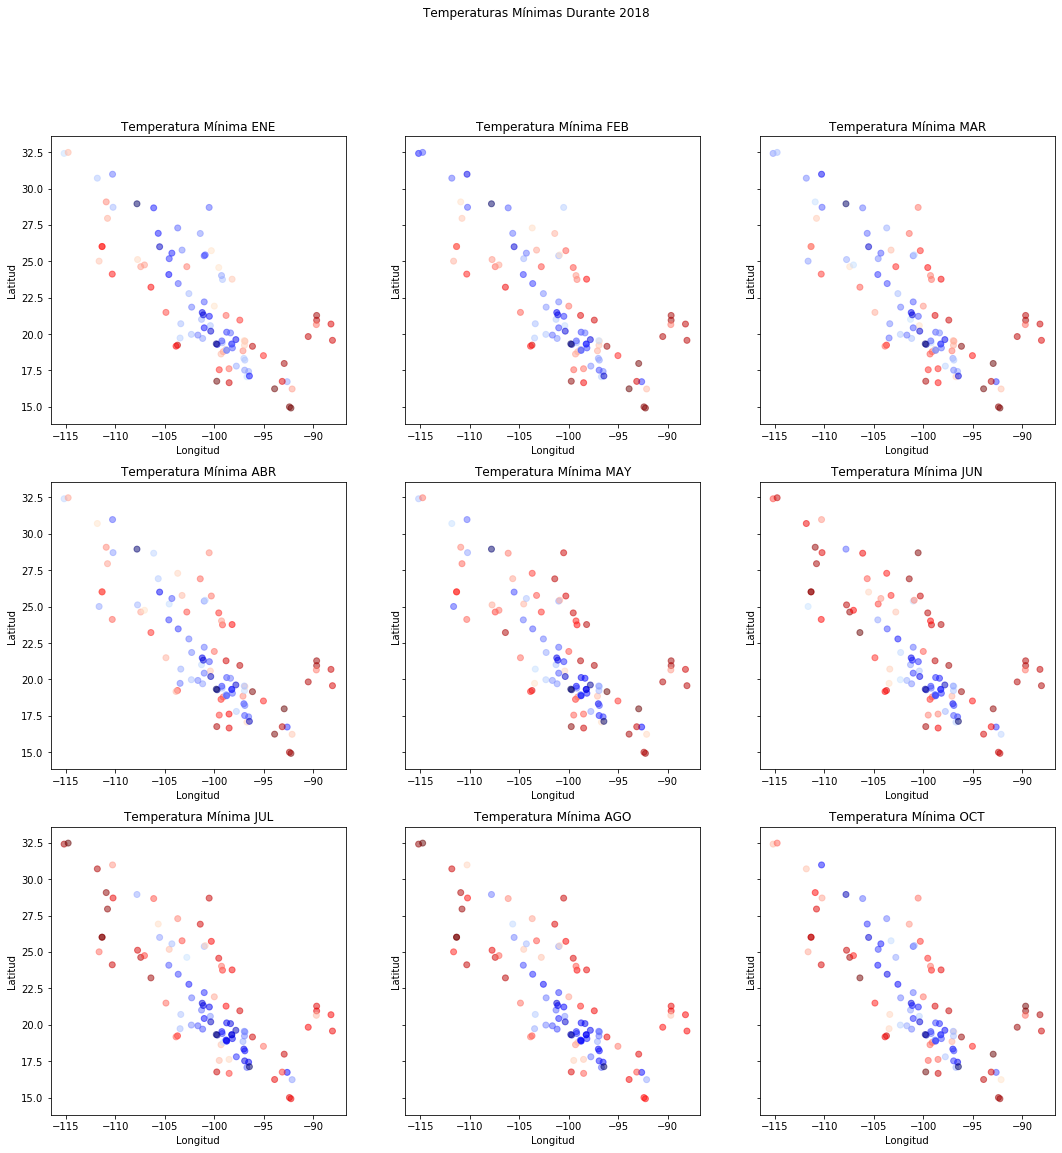

In [239]:
fig, axs = plt.subplots(3, 3, figsize=(18, 18), sharey = True)

months = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'OCT', 'NOV']

fig.suptitle('Temperaturas Mínimas Durante 2018')

k = 0
for i in range(0, 3):
    for j in range(0, 3):
        axs[i, j].scatter(minTempData2018['Lon'], minTempData2018['Lat'], c = minTempData2018[months[k]], alpha = 0.5)
        axs[i, j].set_xlabel('Longitud')
        axs[i, j].set_ylabel('Latitud')
        axs[i, j].title.set_text('Temperatura Mínima ' + months[k])
        k = k + 1

plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.title("Índice de Precipitación Promedio")
plt.xlabel('Mes')
plt.ylabel('Índice de Precipitación Promedio')

x = np.linspace(0, 10, 10)

mean2018 = []
meanRain2018.append(np.mean(rainData2018['ENE']))
meanRain2018.append(np.mean(rainData2018['FEB']))
meanRain2018.append(np.mean(rainData2018['MAR']))
meanRain2018.append(np.mean(rainData2018['ABR']))
meanRain2018.append(np.mean(rainData2018['MAY']))
meanRain2018.append(np.mean(rainData2018['JUN']))
meanRain2018.append(np.mean(rainData2018['JUL']))
meanRain2018.append(np.mean(rainData2018['AGO']))
meanRain2018.append(np.mean(rainData2018['OCT']))
meanRain2018.append(np.mean(rainData2018['NOV']))

meanRain2019 = []
meanRain2019.append(np.mean(rainData2019['ENE']))
meanRain2019.append(np.mean(rainData2019['FEB']))
meanRain2019.append(np.mean(rainData2019['MAR']))
meanRain2019.append(np.mean(rainData2019['ABR']))
meanRain2019.append(np.mean(rainData2019['MAY']))
meanRain2019.append(np.mean(rainData2019['JUN']))
meanRain2019.append(np.mean(rainData2019['JUL']))
meanRain2019.append(np.mean(rainData2019['AGO']))
meanRain2019.append(np.mean(rainData2019['OCT']))
meanRain2019.append(np.mean(rainData2019['NOV']))

ax.set_xticks(x)
ax.set_xticklabels(months, rotation='vertical', fontsize=10)

plt.plot(x, meanRain2018, 'r--', label = '2018')
plt.plot(x, meanRain2019, 'b--', label = '2019')
plt.legend()
plt.show()